In [4]:
import pandas as pd
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from tensorflow import keras
from tensorflow.keras import layers

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ML/Telco Customers.csv') # Please replace 'your_path_here' with the actual path to your file.
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Link to a remote repository (e.g., GitHub)

If you want to push your code to a remote repository (like one on GitHub or GitLab), you'll need to add it as a remote origin. You'll typically need to use a Personal Access Token (PAT) instead of your password for authentication when pushing from Colab, as Colab environments are temporary and don't persist credentials.

First, you'll need to create a repository on your chosen platform (e.g., GitHub) and copy its URL. Then, you can add it as a remote:

And finally, push your changes:

When prompted for username and password, enter your GitHub username and your Personal Access Token (PAT) as the password.

In [5]:
df.shape


(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isnull().sum()
df = df.dropna()

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].isnull().sum()
df = df.dropna()   # remove rows with missing TotalCharges


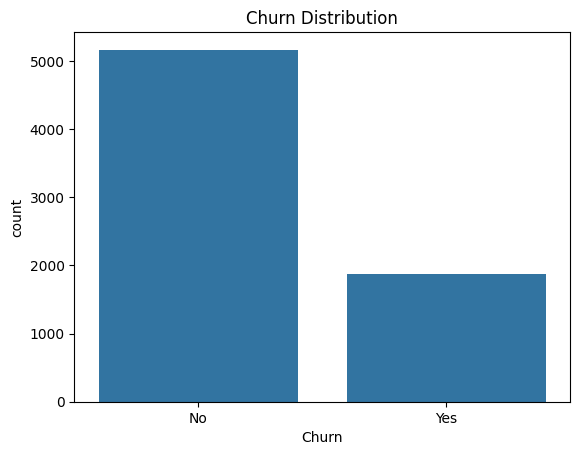

In [10]:
sns.countplot(x=df["Churn"])
plt.title("Churn Distribution")
plt.show()


<Axes: xlabel='Contract', ylabel='count'>

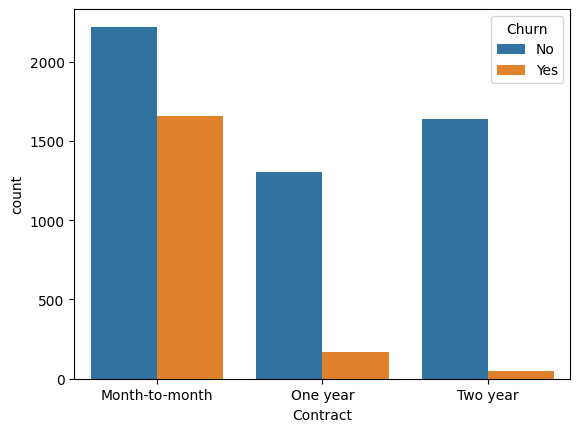

In [11]:
sns.countplot(x="Contract", hue="Churn", data=df)


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

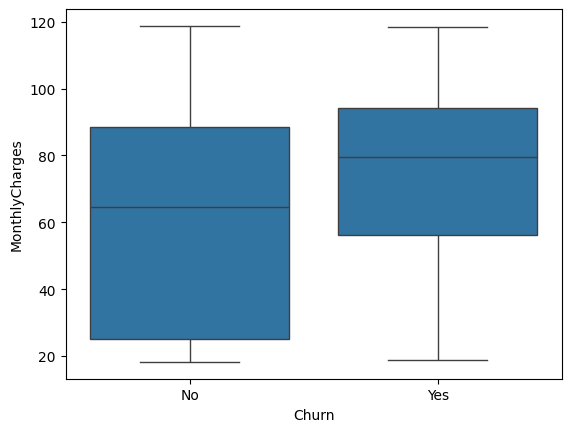

In [12]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)


### 1. Initialize a Git repository

You can initialize a new Git repository in your current Colab environment using the `git init` command. This will create a new `.git` subdirectory in your current working directory.

In [13]:
!
!git init

Reinitialized existing Git repository in /content/.git/


### 2. Configure Git (Optional but Recommended)

It's good practice to configure your user name and email for Git commits. These credentials are used to identify who made the changes.

In [14]:
!
!git config --global user.name "Your Name"
!git config --global user.email "youremail@example.com"

### 3. Add files and make your first commit

Now you can add your notebook files to the repository and make your first commit. You can use `git add .` to add all current files, or specify individual files. Then use `git commit` to save your changes.

In [15]:
!
!git add .
!git commit -m "Initial commit from Google Colab"

[master 0025df3] Initial commit from Google Colab
 6 files changed, 5 insertions(+)
 create mode 100644 tuner_results/churn_nn/oracle.json
 create mode 100644 tuner_results/churn_nn/trial_0/build_config.json
 create mode 100644 tuner_results/churn_nn/trial_0/checkpoint.weights.h5
 create mode 100644 tuner_results/churn_nn/trial_0/trial.json
 create mode 100644 tuner_results/churn_nn/trial_1/trial.json
 create mode 100644 tuner_results/churn_nn/tuner0.json


### 4. Link to a remote repository (e.g., GitHub)

If you want to push your code to a remote repository (like one on GitHub or GitLab), you'll need to add it as a remote origin. You'll typically need to use a Personal Access Token (PAT) instead of your password for authentication when pushing from Colab, as Colab environments are temporary and don't persist credentials.

First, you'll need to create a repository on your chosen platform (e.g., GitHub) and copy its URL. Then, you can add it as a remote:

```bash
!git remote add origin https://github.com/your-username/your-repo-name.git
```

And finally, push your changes:

```bash
!git push -u origin master
```

When prompted for username and password, enter your GitHub username and your Personal Access Token (PAT) as the password.

<Axes: >

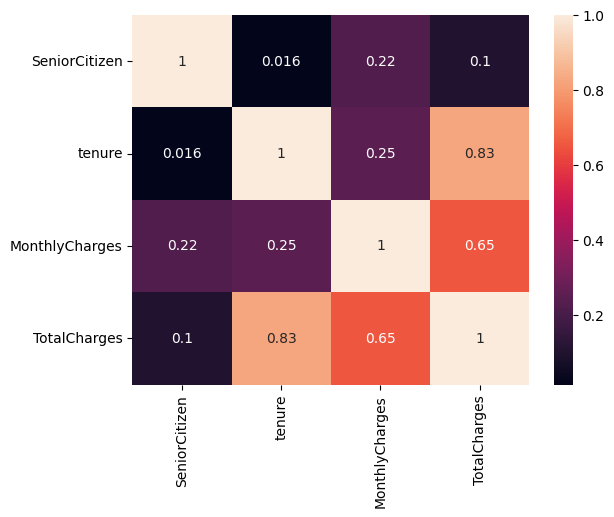

In [16]:
# sns.heatmap(df.corr(), annot=True)
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)



In [17]:
df = df.drop("customerID", axis=1)


In [18]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [19]:
le = LabelEncoder()
y = le.fit_transform(y)


In [20]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns


In [21]:
ct = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("scale", StandardScaler(), num_cols)
])


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


In [24]:
# Option1
# dt_model = DecisionTreeClassifier(max_depth=6,class_weight="balanced")
# dt_model.fit(X_train, y_train)
# dt_pred = dt_model.predict(X_test)

In [25]:
# option2
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy"],
    "class_weight": [None, "balanced"]
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

dt_model = DecisionTreeClassifier(**grid.best_params_)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)


Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [26]:
# option3
# dt_model = DecisionTreeClassifier(
#     max_depth=10,
#     min_samples_split=10,
#     min_samples_leaf=4,
#     criterion="entropy",
#     class_weight="balanced"
# )


In [27]:
accuracy_score(y_test, dt_pred)
report =classification_report(y_test, dt_pred,output_dict=True)
df_report = pd.DataFrame(report).transpose()

print(df_report)

              precision    recall  f1-score     support
0              0.844019  0.853824  0.848893  1033.00000
1              0.582873  0.564171  0.573370   374.00000
accuracy       0.776830  0.776830  0.776830     0.77683
macro avg      0.713446  0.708997  0.711131  1407.00000
weighted avg   0.774603  0.776830  0.775655  1407.00000


In [28]:
#  option1
#  nn_model = keras.Sequential([
#     layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(1, activation="sigmoid")
# ])

# nn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)



In [29]:
!pip install keras-tuner --quiet
from kerastuner.tuners import RandomSearch




/tmp/ipython-input-1688307862.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [30]:
def build_model(hp):
    model = keras.Sequential()

    # Layer 1
    model.add(layers.Dense(
        units=hp.Int('units1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))

    # Layer 2
    model.add(layers.Dense(
        units=hp.Int('units2', min_value=16, max_value=128, step=16),
        activation='relu'
    ))

    # Dropout
    model.add(layers.Dropout(
        rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    ))

    # Output
    model.add(layers.Dense(1, activation='sigmoid'))

    # Learning Rate choices
    lr = hp.Choice('learning_rate', values=[0.0001, 0.0005, 0.001])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [31]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='churn_nn'
)


Reloading Tuner from tuner_results/churn_nn/tuner0.json


In [32]:
tuner.search(X_train, y_train, epochs=20, validation_split=0.2)


Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.8177777528762817

Best val_accuracy So Far: 0.8177777528762817
Total elapsed time: 00h 04m 55s


In [33]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hps.values)


Best hyperparameters:
{'units1': 256, 'units2': 32, 'dropout': 0.2, 'learning_rate': 0.0005}


In [34]:
nn_model = tuner.hypermodel.build(best_hps)

history = nn_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7188 - loss: 0.5383 - val_accuracy: 0.8169 - val_loss: 0.4056
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7935 - loss: 0.4381 - val_accuracy: 0.8187 - val_loss: 0.4023
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8106 - loss: 0.4111 - val_accuracy: 0.8187 - val_loss: 0.3945
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7925 - loss: 0.4362 - val_accuracy: 0.8169 - val_loss: 0.3997
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8100 - loss: 0.4097 - val_accuracy: 0.8053 - val_loss: 0.4026
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8177 - loss: 0.3896 - val_accuracy: 0.8124 - val_loss: 0.3980
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8179 - loss: 0.3982 - val_accuracy: 0.8124 - val_loss: 0.4030
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8160 - loss: 0.3997 - val_accuracy

In [35]:
# opion2
# nn_model = keras.Sequential([
#     layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
#     layers.Dropout(0.2),

#     layers.Dense(64, activation="relu"),
#     layers.Dropout(0.2),

#     layers.Dense(32, activation="relu"),

#     layers.Dense(1, activation="sigmoid")
# ])
# optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# nn_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



In [36]:
nn_pred = nn_model.predict(X_test)
nn_pred = (nn_pred > 0.5).astype(int)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [37]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))


Decision Tree Accuracy: 0.7768301350390903
Neural Network Accuracy: 0.7647476901208244
